In [1]:
# this notebook is for merging data only

# standard libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get the datetime library for date & time calcs
from datetime import datetime, timedelta

In [2]:
# get the joint table

urlRev = os.path.normpath('C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/ChurnModelFiles/prodRevData.csv')
data = pd.read_csv(urlRev)

In [5]:
data.head()

,Unnamed: 0,CustID,OpenedChecking,EHI,TotAssets,EqiScore,VinScore,Rev2016,Rev2015,Rev2014,...,NumProducts,Open,OpenAccts,CdiraOpen,CheckingOpen,Credit_CardOpen,InvestmentsOpen,MortgageOpen,SavingsOpen,TotRev
0,0,F14,1,48087.0,190891.0,704.0,753.0,0.52,0.00,0.00,...,3.0,2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.52
1,1,F143,0,41421.0,34675.0,700.0,755.0,1.20,1.32,-30.36,...,6.0,5,5.0,0.0,1.0,2.0,0.0,0.0,1.0,-27.84
2,2,F538,1,26096.0,19632.0,635.0,691.0,211.02,35.01,0.00,...,3.0,2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,246.03
3,3,F879,1,47729.0,320.0,739.0,791.0,0.00,-50.74,1.32,...,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-49.42
4,4,F1496,1,51707.0,11590.0,651.0,700.0,0.00,10.71,0.00,...,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.71


In [4]:
# get the revenue table

# create a total revenue column

data['TotRev'] = data['Rev2014'] + data['Rev2015'] + data['Rev2016']

In [9]:
os.getcwd()

'C:\\Users\\n846490\\Documents\\Python Scripts\\SurvivalAnalysis\\ChurnModelFiles'

In [8]:
os.chdir(os.path.normpath('C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/ChurnModelFiles/'))

In [11]:
data.to_csv('prodRevData.csv')

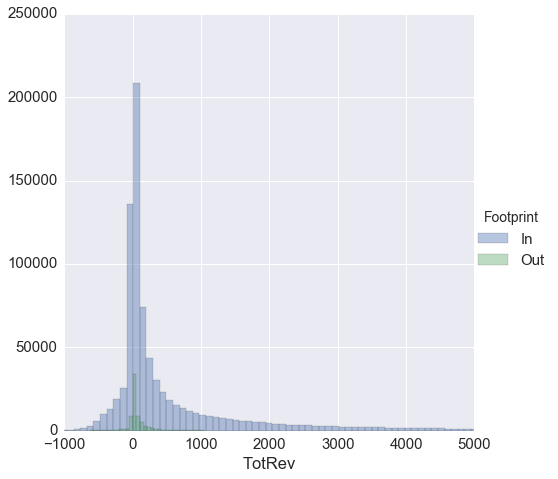

In [51]:
# this yeields a high level view

fig = sns.FacetGrid(data=data, hue='Footprint', size = 7)

fig.map(sns.distplot,'TotRev', bins = 10000, kde = False)

fig.set(xlim=(-1000,5000))

fig.add_legend(title='Footprint')

In [56]:
# first slice the data

zoom = data[(data['TotRev'] > -500) & (data['TotRev'] < 500)]

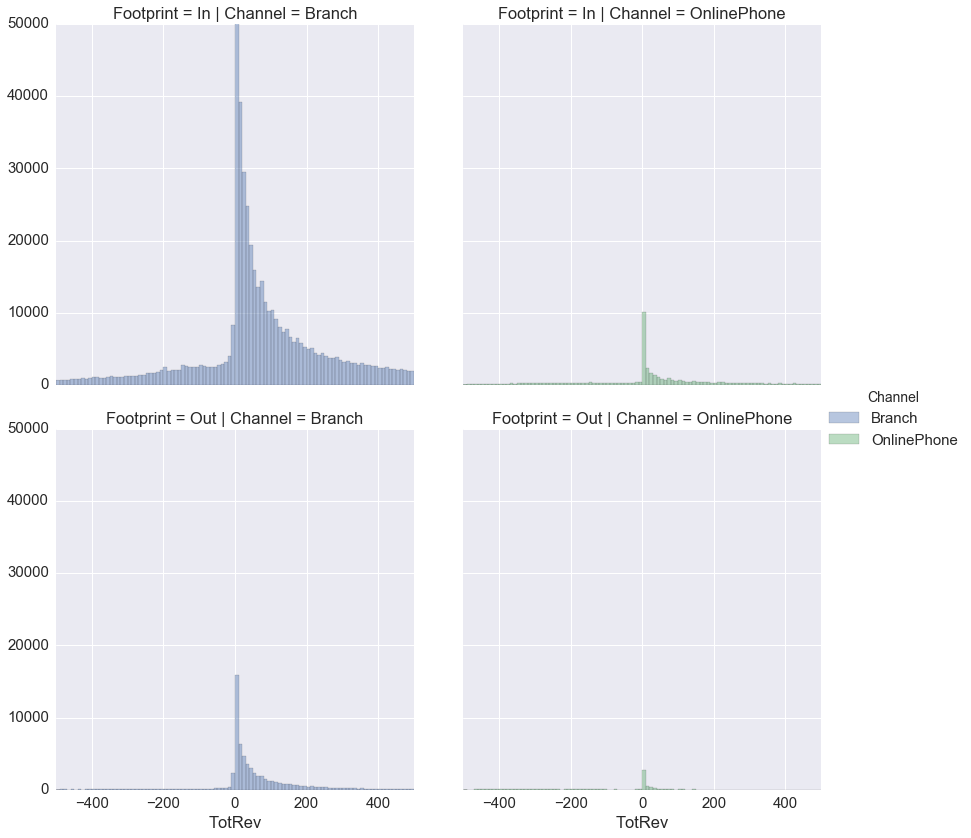

In [60]:
# zoom in with a plot

sns.set(font_scale=1.5)

fig = sns.FacetGrid(data=zoom, row = 'Footprint', col = 'Channel', hue = 'Channel', size = 6)

fig.map(sns.distplot,'TotRev', bins = 100, kde = False)

fig.set(xlim=(-500,500))
fig.set(ylim=(0,50000))

fig.add_legend(title='Channel')
